In [158]:
#### Load Data
## refer by  : https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
#######################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('file_price_house/train_clean.csv')
df_test = pd.read_csv('file_price_house/test_clean.csv')

#df_train = pd.read_csv('file_price_house/train.csv')
#df_test = pd.read_csv('file_price_house/test_clean.csv')
#print(df.feature_names)



df.head()


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,is_select_SalePrice,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,208500.0,7.0,1710.00,2.0,548.0,856.0,856.0,2.0,7.0,2000.0
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,181500.0,6.0,1262.00,2.0,460.0,1262.0,1262.0,2.0,6.0,1976.0
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,214000.0,7.0,1776.75,2.0,576.0,920.0,920.0,2.0,6.0,2000.0
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,140000.0,7.0,1717.00,2.0,576.0,756.0,961.0,1.0,7.0,1915.0
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,214000.0,7.0,1776.75,2.0,576.0,1145.0,1145.0,2.0,7.0,2000.0


In [159]:
#df_numeric = df.select_dtypes(include=[np.number])
#numeric_cols = df_numeric.columns.values

IsSelect = [col for col in df.columns if 'is_select_'  in col] 
IsSelect.insert(0, 'Id')
IsSelect.insert(1, 'SalePrice')
  
df_numeric  = df[IsSelect]
numeric_cols = IsSelect

df_numeric["SalePrice"] = df_numeric["is_select_SalePrice"]

print("----------------------------------------")
print("### numeric columns -> ",len(numeric_cols))
print(numeric_cols) 


df_numeric.head()
 


----------------------------------------
### numeric columns ->  12
['Id', 'SalePrice', 'is_select_SalePrice', 'is_select_OverallQual', 'is_select_GrLivArea', 'is_select_GarageCars', 'is_select_GarageArea', 'is_select_TotalBsmtSF', 'is_select_1stFlrSF', 'is_select_FullBath', 'is_select_TotRmsAbvGrd', 'is_select_YearBuilt']


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Id,SalePrice,is_select_SalePrice,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt
0,1,208500.0,208500.0,7.0,1710.00,2.0,548.0,856.0,856.0,2.0,7.0,2000.0
1,2,181500.0,181500.0,6.0,1262.00,2.0,460.0,1262.0,1262.0,2.0,6.0,1976.0
2,3,214000.0,214000.0,7.0,1776.75,2.0,576.0,920.0,920.0,2.0,6.0,2000.0
3,4,140000.0,140000.0,7.0,1717.00,2.0,576.0,756.0,961.0,1.0,7.0,1915.0
4,5,214000.0,214000.0,7.0,1776.75,2.0,576.0,1145.0,1145.0,2.0,7.0,2000.0


In [160]:
#Create train and test set
#########################
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_numeric, test_size = 0.3) 


x_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

x_test = test.drop('SalePrice', axis = 1)
y_test = test['SalePrice']
  

#x_train.head()
print(x_train.shape)
#y_train.head()
print(y_train.shape)
#x_test.head()
print(x_test.shape)
#y_test.head()
print(y_test.shape)



(1022, 11)
(1022,)
(438, 11)
(438,)


In [161]:
x_train.head()

,Id,is_select_SalePrice,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt
840,841,140000.0,6.0,1482.0,1.0,400.0,672.00,810.00,2.0,7.0,1925.0
0,1,208500.0,7.0,1710.0,2.0,548.0,856.00,856.00,2.0,7.0,2000.0
930,931,201000.0,7.0,1466.0,2.0,576.0,1298.25,1391.25,2.0,7.0,2000.0
764,765,214000.0,7.0,1494.0,2.0,481.0,1298.25,1391.25,1.0,6.0,1995.0
102,103,118964.0,5.0,1535.0,2.0,410.0,0.00,1391.25,2.0,7.0,1979.0


In [162]:
x_test.head()

,Id,is_select_SalePrice,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt
678,679,214000.0,7.0,1776.75,2.0,576.0,1298.25,1391.25,2.0,7.0,2000.0
813,814,157900.0,6.0,1442.00,1.0,301.0,1298.25,1391.25,1.0,7.0,1958.0
521,522,150000.0,6.0,1244.00,1.0,336.0,1244.00,1244.00,1.0,6.0,1957.0
41,42,170000.0,5.0,1328.00,1.0,308.0,1298.25,1328.00,1.0,5.0,1959.0
616,617,183200.0,6.0,1509.00,2.0,393.0,783.00,807.00,2.0,7.0,2000.0


In [165]:
# Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [166]:
#Let us have a look at the error rate for different k values
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
    from sklearn import metrics 

    rmse_val = [] #to store rmse values for different k
    for K in range(20):
        K = K+1
        model = neighbors.KNeighborsRegressor(n_neighbors = K)

        model.fit(x_train, y_train)  #fit the model
        pred=model.predict(x_test) #make prediction on test set
        error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        #accurency = metrics.accuracy_score(y_test, pred)
        rmse_val.append(error) #store rmse values
        print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 15684.10306466144
RMSE value for k=  2 is: 14212.067513469674
RMSE value for k=  3 is: 13595.074707943357
RMSE value for k=  4 is: 13275.275663962508
RMSE value for k=  5 is: 12998.74993800115
RMSE value for k=  6 is: 12781.748368197514
RMSE value for k=  7 is: 12790.102124124769
RMSE value for k=  8 is: 12887.894481832007
RMSE value for k=  9 is: 13066.820766709887
RMSE value for k=  10 is: 13187.95832725504
RMSE value for k=  11 is: 13373.381996698656
RMSE value for k=  12 is: 13338.546107619595
RMSE value for k=  13 is: 13537.964173341868
RMSE value for k=  14 is: 13640.214499275067
RMSE value for k=  15 is: 13682.384493631129
RMSE value for k=  16 is: 13702.56650756774
RMSE value for k=  17 is: 13737.766030765153
RMSE value for k=  18 is: 13749.76702927491
RMSE value for k=  19 is: 13740.867290683966
RMSE value for k=  20 is: 13814.68680848604


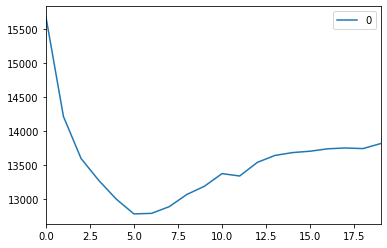

In [168]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [169]:
### จากกราฟเราเลือก k = 10 เพราะ มองว่า stable มากสุด
## RMSE value for k=  10 is: 45433.85126002181 ยิ่งน้อยยิ่งดี
####################################################
train_ID = df['Id']
test_ID = df_test['Id']

#  drop the 'Id'   ไม่จำเป็น
df.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

# Check data size after dropping the 'Id' variable
print("\nThe Train Data size : {} ".format(df.shape)) 
print("The Test data size  : {} ".format(df_test.shape))



The Train Data size : (1460, 87) 
The Test data size  : (1459, 85) 


In [170]:
# ข้อมูล train
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,is_select_SalePrice,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt
0,0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,208500.0,7.0,1710.00,2.0,548.0,856.0,856.0,2.0,7.0,2000.0
1,1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,181500.0,6.0,1262.00,2.0,460.0,1262.0,1262.0,2.0,6.0,1976.0
2,2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,214000.0,7.0,1776.75,2.0,576.0,920.0,920.0,2.0,6.0,2000.0
3,3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,140000.0,7.0,1717.00,2.0,576.0,756.0,961.0,1.0,7.0,1915.0
4,4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,214000.0,7.0,1776.75,2.0,576.0,1145.0,1145.0,2.0,7.0,2000.0


In [171]:
#ข้อมูลที่ Test
df_test.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt
0,0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,Normal,5.0,896.0,1.0,576.0,882.0,896.0,1.0,5.0,1961.0
1,1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,Normal,6.0,1329.0,1.0,312.0,1304.0,1329.0,1.0,6.0,1958.0
2,2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,Normal,5.0,1629.0,2.0,482.0,928.0,928.0,2.0,6.0,1997.0
3,3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,Normal,6.0,1604.0,2.0,470.0,926.0,926.0,2.0,7.0,1998.0
4,4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,Normal,7.0,1280.0,2.0,506.0,1280.0,1280.0,2.0,5.0,1992.0


In [172]:
 #Impute Missing Data and Clean Data
# Combining Datasets
ntrain = df.shape[0]
ntest = df_test.shape[0]
y_train = df.SalePrice.values
all_data = pd.concat((df, df_test)).reset_index(drop=True)
#all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Train data size is : {}".format(df.shape))
print("Test data size is : {}".format(df_test.shape))
print("Combined dataset size is : {}".format(all_data.shape))

Train data size is : (1460, 87)
Test data size is : (1459, 85)
Combined dataset size is : (2919, 87)


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [173]:
#show All data
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,is_select_1stFlrSF,is_select_FullBath,is_select_GarageArea,is_select_GarageCars,is_select_GrLivArea,is_select_OverallQual,is_select_SalePrice,is_select_TotRmsAbvGrd,is_select_TotalBsmtSF,is_select_YearBuilt
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,856.0,2.0,548.0,2.0,1710.00,7.0,208500.0,7.0,856.0,2000.0
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,1262.0,2.0,460.0,2.0,1262.00,6.0,181500.0,6.0,1262.0,1976.0
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,920.0,2.0,576.0,2.0,1776.75,7.0,214000.0,6.0,920.0,2000.0
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,961.0,1.0,576.0,2.0,1717.00,7.0,140000.0,7.0,756.0,1915.0
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,1145.0,2.0,576.0,2.0,1776.75,7.0,214000.0,7.0,1145.0,2000.0


In [210]:
 # all_data.select_dtypes(include=[np.number])
    
#final_train = (all_data[:ntrain]).select_dtypes(include=[np.number])  
#final_test = (all_data[ntrain:]).select_dtypes(include=[np.number])  
final_train = (all_data[:ntrain]) 
final_test = (all_data[ntrain:])
 
if set(['Id']).issubset(IsSelect):
  IsSelect.remove('Id')

final_train=final_train[IsSelect]
final_test=final_test[IsSelect]

fy_train = final_train['SalePrice']
fx_train = final_train.drop('SalePrice', axis=1)

fy_test = final_test['SalePrice'] 
fx_test = final_test.drop('SalePrice', axis = 1) 
 
    
print("Train data size is : {}".format(final_train.shape))
print("Test data size is : {}".format(final_test.shape)) 

fy_train.head()


Train data size is : (1460, 11)
Test data size is : (1459, 11)


0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [235]:
print("Train data size is : {}".format(final_train.shape))
print("Test data size is : {}".format(final_test.shape)) 
   
#fx_test = fx_test.drop('is_select_SalePrice', axis=1)
#fx_train = fx_train.drop('is_select_SalePrice', axis=1)


fx_train
#fx_test

Train data size is : (1460, 11)
Test data size is : (1459, 11)


,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt
0,7.0,1710.00,2.0,548.0,856.00,856.00,2.0,7.0,2000.0
1,6.0,1262.00,2.0,460.0,1262.00,1262.00,2.0,6.0,1976.0
2,7.0,1776.75,2.0,576.0,920.00,920.00,2.0,6.0,2000.0
3,7.0,1717.00,2.0,576.0,756.00,961.00,1.0,7.0,1915.0
4,7.0,1776.75,2.0,576.0,1145.00,1145.00,2.0,7.0,2000.0
...,...,...,...,...,...,...,...,...,...
1455,6.0,1647.00,2.0,460.0,953.00,953.00,2.0,7.0,1999.0
1456,6.0,1776.75,2.0,500.0,1298.25,1391.25,2.0,7.0,1978.0
1457,7.0,1776.75,1.0,252.0,1152.00,1188.00,2.0,7.0,1941.0
1458,5.0,1078.00,1.0,240.0,1078.00,1078.00,1.0,5.0,1950.0


In [237]:
import numpy as np
from sklearn import metrics 
#Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?

K = 10
model = neighbors.KNeighborsRegressor(n_neighbors = K)

model.fit(fx_train, fy_train)  #fit the model
pred2=model.predict(fx_test) #make prediction on test set
#error = sqrt(mean_squared_error(fy_test,pred)) #calculate rmse 
#print('RMSE value for k= ' , K , 'is:', error)
 
#print(pred2)
#print("Accuracy k=10:",metrics.accuracy_score(fy_test, pred2))
 
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = pred2
sub.to_csv('file_price_house/submission_KNN.csv',index=False) 
#sub.head()
